## Importing Libraries

In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Model

In [44]:
model = tf.keras.models.load_model('trained_model.keras')

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_26 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

### Visualizing Single Image of Test Set

In [5]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   --- ------------------------------------ 3.4/38.8 MB 20.2 MB/s eta 0:00:02
   ---- ----------------------------------- 4.5/38.8 MB 12.2 MB/s eta 0:00:03
   ----- ---------------------------------- 5.2/38.8 MB 10.0 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/38.8 MB 8.4 MB/s eta 0:00:04
   ------- -------------------------------- 7.6/38.8 MB 7.7 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/38.8 MB 7.2 MB/s eta 0:00:05
   -------- ------------------------------- 8.7/38.8 MB 6.1 MB/s eta 0:00:05
   --------- ------------------------------ 8.9/38.8 MB 5.7 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/38.8 MB 5.2 MB/s eta 0:00:06
   ---------- ----------------------------- 10.2/38.8 MB 4.9 MB/s eta 0:00:06
   ----------- ---------------------------- 10.7/38.8 MB 4.8 MB/s eta 0:00:06
   ----------- ---------------------------- 11.5/38.8 MB 4.7 MB/s eta 0:00:06


In [46]:
import cv2

In [47]:
image_path = "test/PotatoEarlyBlight5.JPG"

In [48]:
# Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Coverting image from BGR to RGB format

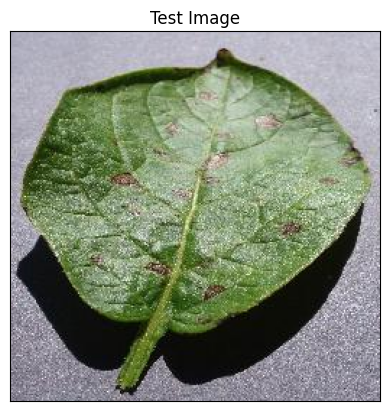

In [49]:
# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [50]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))

In [51]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Done to covert a single image to a batch as we trained the model on 32 batches
print (input_arr.shape)

(1, 128, 128, 3)


In [52]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 240ms/step


(array([[9.71571803e-02, 4.57719352e-06, 5.82608166e-08, 6.19820144e-04,
         1.68779434e-06, 1.70728001e-07, 4.06726599e-07, 6.53030483e-08,
         3.33382748e-04, 4.31999680e-09, 4.04656503e-10, 3.79208331e-10,
         1.00941327e-06, 1.86599469e-09, 1.87334610e-11, 2.49215351e-08,
         5.81104644e-07, 2.54417785e-08, 2.02334166e-04, 1.35677794e-07,
         9.01376963e-01, 6.08664692e-08, 7.63571961e-08, 1.12264451e-11,
         6.49613874e-09, 2.80572614e-08, 1.03858095e-08, 1.67246284e-07,
         7.45751863e-11, 7.49904757e-07, 4.75880443e-05, 1.34508236e-05,
         2.39023037e-04, 5.55469603e-12, 4.30792859e-08, 7.59637687e-13,
         2.67177998e-11, 2.45869899e-07]], dtype=float32),
 (1, 38))

In [53]:
result_index = np.argmax(prediction)
result_index

20

In [54]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

## Displaying Result of Disease Prediction

In [55]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()